# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [3]:
data.head(3)

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes


1) 변수의 비즈니스 의미

> 각 지역 판매액 (단위:1,000달러)

2) 숫자, 범주?

In [5]:
data['Sales'].value_counts()

# 숫자형

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

3) NaN 존재 유무

In [6]:
data['Sales'].isnull().sum()

0

4) 기초통계량(수치화)

In [7]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

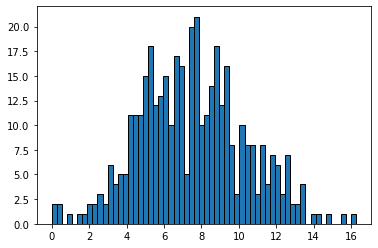

In [171]:
plt.hist(data=data, x='Sales', bins=60, edgecolor='k')
plt.show()

# 비교적 정규분포에 가까우나 50% 지역이 들쑥날쑥하다.

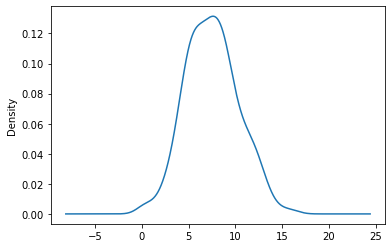

In [10]:
data['Sales'].plot(kind='kde')
plt.show()

# 중간지점에 몰려있다.

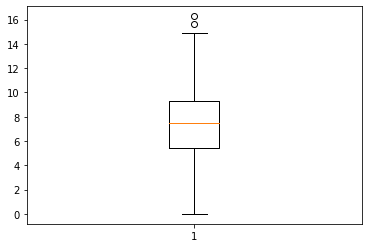

In [13]:
plt.boxplot(data=data, x='Sales')
plt.show()

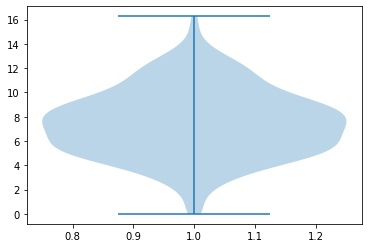

In [15]:
plt.violinplot(data['Sales'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 시트의 가격이 비교적 평균에 많이 분포해있다.  
> - 매우 높은 가격을 기록한 물품들이 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 중간 지점 중 비어있는 데이터들이 있다.  
> - 높은 가격을 기록한 이유

### 2) Advertising

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

In [18]:
data['Advertising'].value_counts()

#숫자형

0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
14     11
8      11
9      10
2       9
1       8
19      8
6       7
17      6
18      6
20      4
22      2
23      2
21      1
24      1
25      1
26      1
29      1
Name: Advertising, dtype: int64

3) NaN 존재 유무

In [19]:
data['Advertising'].isnull().sum()

0

4) 기초통계량(수치화)

In [20]:
data['Advertising'].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

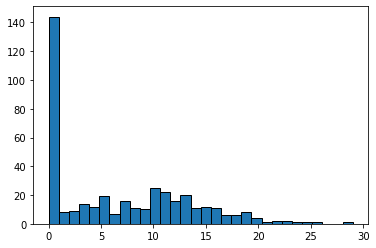

In [25]:
plt.hist(data=data, x='Advertising', bins=30, edgecolor='k')
plt.show()

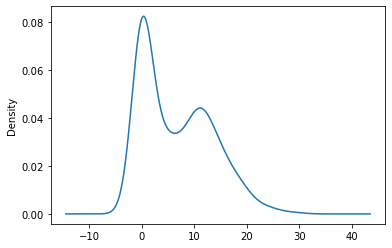

In [26]:
data['Advertising'].plot(kind='kde')
plt.show()

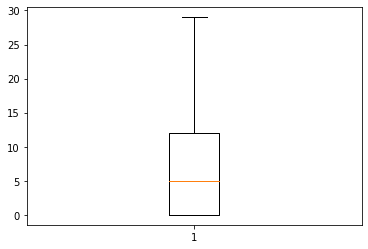

In [27]:
plt.boxplot(data=data,x='Advertising')
plt.show()

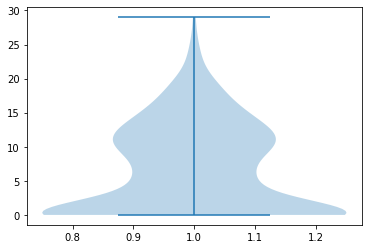

In [29]:
plt.violinplot(data['Advertising'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 25%까지 0을 기록하고 있다.  
> - 낮은 가격을 기록한 데이터들이 압도적으로 많다.  
> - 이상치는 존재하지 않는다.

7) 추가 분석해 볼 사항이 있나요?

> * 광고비에 따라 판매액의 변화

### 3) Population

In [30]:
data.head(3)

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes


1) 변수의 비즈니스 의미

> 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

In [32]:
data['Population'].value_counts()

# 숫자형

237    4
170    4
125    4
220    4
276    4
      ..
219    1
226    1
230    1
232    1
509    1
Name: Population, Length: 275, dtype: int64

3) NaN 존재 유무

In [33]:
data['Population'].isnull().sum()

0

4) 기초통계량(수치화)

In [34]:
data['Population'].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

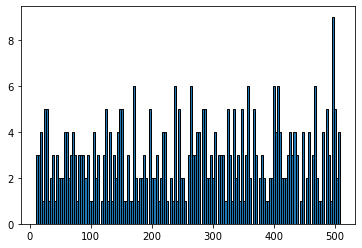

In [40]:
plt.hist(data['Population'], bins=150, edgecolor='k')
plt.show()

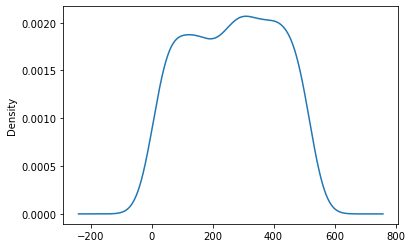

In [38]:
data['Population'].plot(kind='kde')
plt.show()

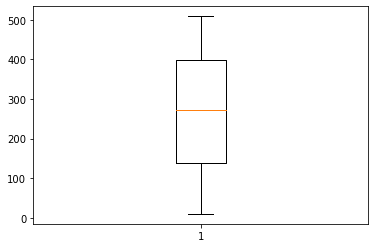

In [41]:
plt.boxplot(data['Population'])
plt.show()

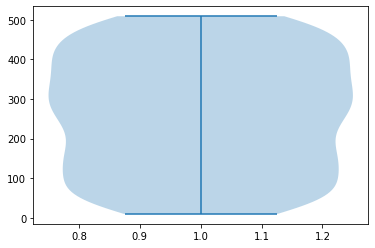

In [42]:
plt.violinplot(data['Population'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 분포가 최소부터 최대까지 비교적 고르게 분포해있다.  
> - 지역의 인구분포가 고르게 분포하고 있는 것을 알 수 있다.
>
>
> - 지역별 판매액의 차이는 없을 것이다.

7) 추가 분석해 볼 사항이 있나요?

> * 

### 4) Price

In [44]:
data.head(3)

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes


1) 변수의 비즈니스 의미

> 자사 지역별 판매가격(달러)

2) 숫자, 범주?

In [46]:
data['Price'].value_counts()

# 숫자형

128    12
120    12
131    10
104    10
107    10
       ..
63      1
55      1
54      1
53      1
191     1
Name: Price, Length: 101, dtype: int64

3) NaN 존재 유무

In [47]:
data['Price'].isnull().sum()

0

4) 기초통계량(수치화)

In [48]:
data['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

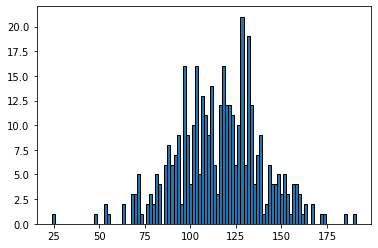

In [51]:
plt.hist(data['Price'], bins=100, edgecolor='k')
plt.show()

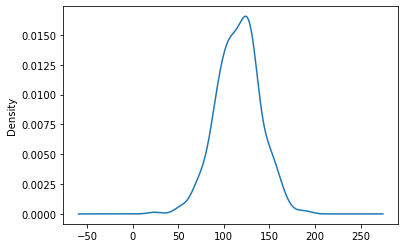

In [52]:
data['Price'].plot(kind='kde')
plt.show()

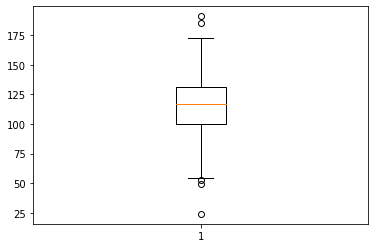

In [53]:
plt.boxplot(data['Price'])
plt.show()

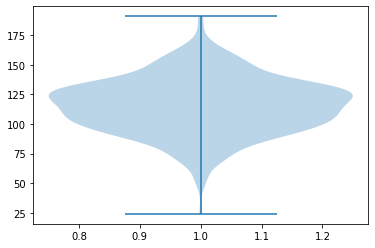

In [54]:
plt.violinplot(data['Price'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 평균(115.7950)보다 높은 약 125 지점에 많은 분포를 하고 있다. 
> - 높고 낮은 이상치가 존재한다.  


> - 지역별 인구분포는 비슷하지만, 물품에 대한 가격 차이가 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 지역별 인구분포가 고르지만 물품에 대한 가격 차이가 있는 것으로 보아, 지역별 빈부격차를 확인해볼 필요가 있다.

### 5) ShelveLoc

In [55]:
data.head(3)

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes


1) 변수의 비즈니스 의미

> 진열상태(Good, Medium, Bad)

2) 숫자, 범주?

In [57]:
data['ShelveLoc'].value_counts()

# 범주형

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

3) NaN 존재 유무

In [59]:
data['ShelveLoc'].isnull().sum()

0

4) 기초통계량(수치화)

In [60]:
data['ShelveLoc'].describe()

# value_counts 가 더 의미 있을듯

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

5) 분포 확인(시각화)

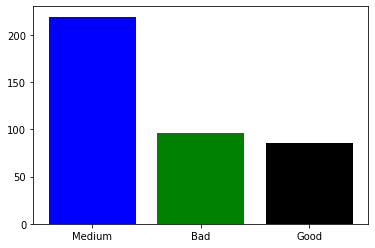

In [71]:
table = data['ShelveLoc'].value_counts()

plt.bar(table.index, table.values, color=['b','g','k'])
plt.show()

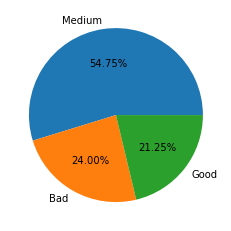

In [81]:
plt.pie(table.values, labels=table.index, autopct='%.2f%%')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 좋음과 나쁨으로 따졌을 때, 나쁜 경우가 더 많다.  
> - 전체로 보았을 때, 좋은 경우가 21.25% 로 그치고 있다.  


> - 진열 상태 변경을 고려할만 하다.

7) 추가 분석해 볼 사항이 있나요?

> * 물품별 판매 대수 확인하여 인기품목, 비인기품목을 확인

### 6) [추가]Age

In [82]:
data.head(3)

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes


1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

In [84]:
data['Age'].value_counts()

# 숫자형

62    14
80    13
61    12
76    11
73    10
65    10
64    10
55    10
45    10
39     9
56     9
42     9
25     9
34     9
50     8
60     8
54     8
26     8
72     8
51     8
57     8
33     8
44     8
79     8
29     7
28     7
63     7
43     7
36     7
41     7
69     6
66     6
38     6
74     6
75     6
27     6
77     6
30     6
53     6
52     6
35     6
47     6
48     6
32     6
71     5
59     5
58     5
67     5
70     4
49     4
68     4
46     4
78     4
37     3
40     3
31     3
Name: Age, dtype: int64

3) NaN 존재 유무

In [86]:
data['Age'].isnull().sum()

0

4) 기초통계량(수치화)

In [87]:
data['Age'].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

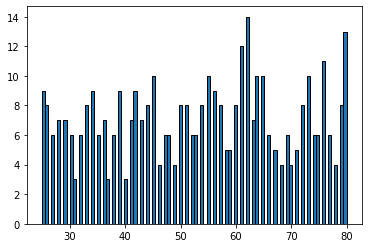

In [89]:
plt.hist(data['Age'], bins=100, edgecolor='k')
plt.show()

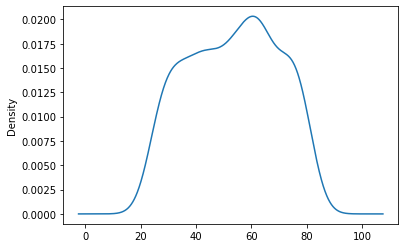

In [90]:
data['Age'].plot(kind='kde')
plt.show()

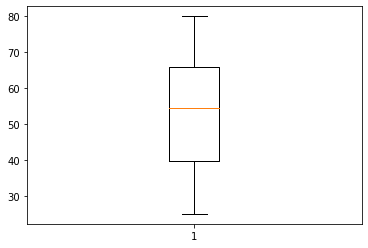

In [91]:
plt.boxplot(data['Age'])
plt.show()

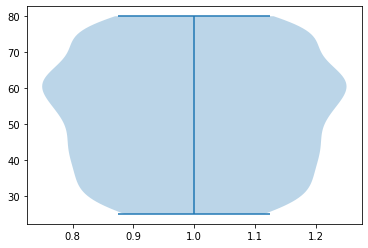

In [92]:
plt.violinplot(data['Age'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 고른 편이다.  
> - 60대 이상 분포가 다른 나이대에 비해 높은 경향을 보인다.  


> - 60대의 경우 손자, 손녀이거나 자식의 자녀들을 대신 돌보는 경우가 있을 수 있다.
> - 늦둥이 경우, 3-40대 보다 높다고 볼 수 없을 것이다.(?)

7) 추가 분석해 볼 사항이 있나요?

> * 60대의 분포 지역 확인

### 7) [추가]US

In [93]:
data.head(3)

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes


1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부(Yes, No)

2) 숫자, 범주?

In [95]:
data['US'].value_counts()

# 범주형

Yes    258
No     142
Name: US, dtype: int64

3) NaN 존재 유무

In [96]:
data['US'].isnull().sum()

0

4) 기초통계량(수치화)

In [97]:
data['US'].describe()

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object

5) 분포 확인(시각화)

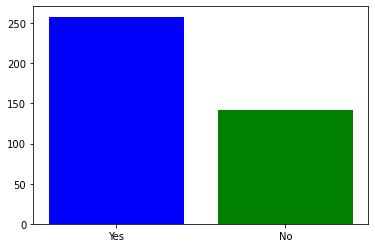

In [99]:
table = data['US'].value_counts()

plt.bar(table.index, table.values, color=['b','g'])
plt.show()

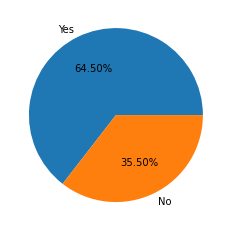

In [100]:
plt.pie(table.values, labels=table.index, autopct='%.2f%%')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * US에 존재하는 지역이 더 많다.
> - 존재하지 않는 지역의 물품은 어디서 구매하는지 확인해 볼 만 하다.

7) 추가 분석해 볼 사항이 있나요?

> * 

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [104]:
target = 'Sales'
feature = 'Advertising'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

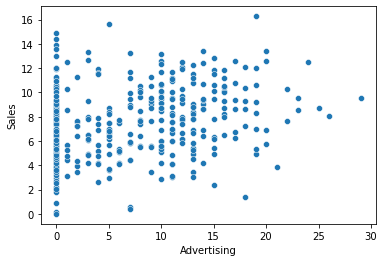

In [105]:
sns.scatterplot(data=data, x=feature, y=target)
plt.show()

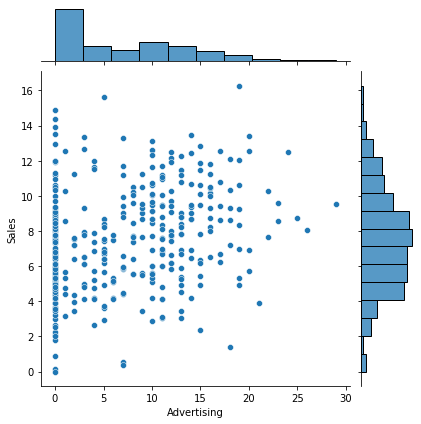

In [106]:
sns.jointplot(data=data, x=feature, y=target)
plt.show()

② 수치화 : 상관분석

In [109]:
spst.pearsonr(data[feature], data[target])

(0.269506781376902, 4.377677110302732e-08)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 산점도에서 광고비가 0임에도 높은 판매액을 보이는 경우가 있다.
> - 광고비가 높은 부분은 비교적 높은 판매액을 보이는 경우가 많다.
> - 상관계수가 0.26950 으로 낮은 편이다.


> - 광고비가 판매에 영향을 미친다고 보기 어렵다. (약한 상관관계)

#### 2) Population -> Sales

In [110]:
target = 'Sales'
feature = 'Population'

① 시각화 : scatter(regplot), jointplot

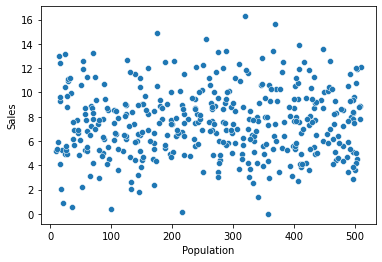

In [112]:
sns.scatterplot(data=data, x=feature, y=target)
plt.show()

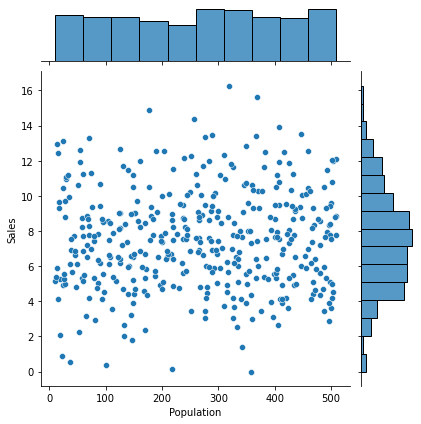

In [113]:
sns.jointplot(data=data, x=feature, y=target)
plt.show()

② 수치화 : 상관분석

In [114]:
spst.pearsonr(data[feature], data[target])

(0.0504709844720392, 0.31398160931903)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 산점도에서 특징을 찾기 어렵다.  
> - 상관계수가 0.05047로 매우 작다.

> - 인구수가 판매액에 영향을 주지는 않는다고 볼 수 있다.

#### 3) Price -> Sales

In [173]:
feature = 'Price'
target = 'Sales'

① 시각화 : scatter(regplot), jointplot

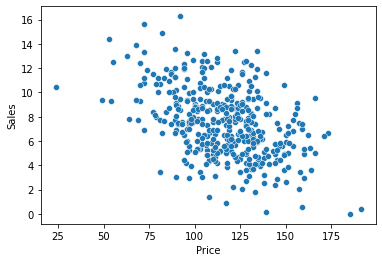

In [126]:
sns.scatterplot(data=data, x=feature, y=target)
plt.show()

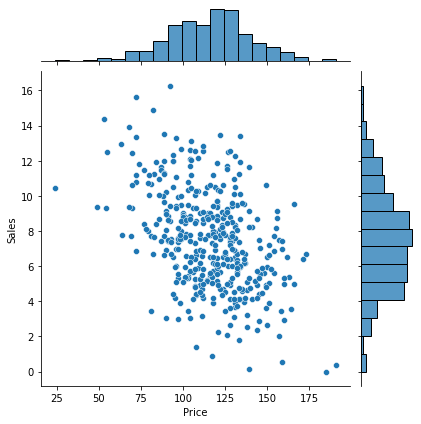

In [127]:
sns.jointplot(data=data, x=feature, y=target)
plt.show()

② 수치화 : 상관분석

In [174]:
tmp = spst.pearsonr(data[feature], data[target])
tmp

(-0.4449507278465726, 7.61818701191294e-21)

In [177]:
print('상관계수 :',tmp[0])
print('p-value :', tmp[1])

상관계수 : -0.4449507278465726
p-value : 7.61818701191294e-21


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 산점도에서 음의 상관관계의 그래프를 보인다.
> - 상관계수가 -0.44495 로 비교적 강한 음의 상관관계를 보인다.

> - 지역별 가격이 판매액에 영향을 미친다고 볼 수 있다. (중간 이상의 음의 상관관계)

#### 4) [추가] Age -> Sales

In [178]:
feature = 'Age'

① 시각화 : scatter(regplot), jointplot

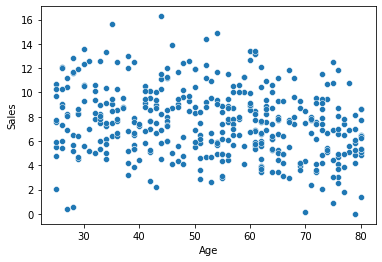

In [130]:
sns.scatterplot(data=data, x=feature, y=target)
plt.show()

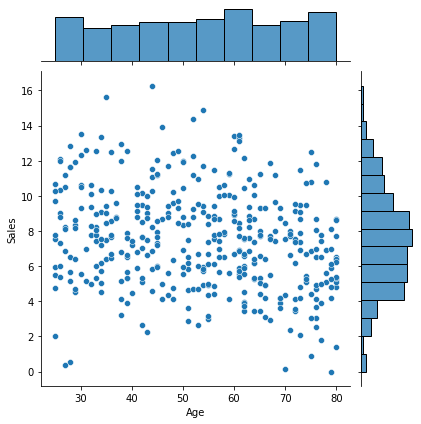

In [131]:
sns.jointplot(data=data, x=feature, y=target)
plt.show()

② 수치화 : 상관분석

In [179]:
tmp = spst.pearsonr(data[feature], data[target])
tmp

(-0.2318154396045765, 2.7889498393711916e-06)

In [180]:
print('상관계수 :',tmp[0])
print('p-value :', tmp[1])

상관계수 : -0.2318154396045765
p-value : 2.7889498393711916e-06


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 산점도 그래프에서 전체적인 특징을 찾아보기 힘들다.
> - 3-50대는 낮은 가격의 물품은 거의 사지 않는다.
> - 산점도에서 7-80대의 판매액이 비교적 낮은 수준을 보이고 있다.
> - 상관계수가 -0.23182 로 약한 음의 상관관계를 가진다.


> - 나이대가 판매액에 매우 약한 음의 상관관계를 가진다 할 수 있다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

In [140]:
feature='ShelveLoc'

#### 1) ShelveLoc-> Sales

① 시각화 : 평균비교 barplot

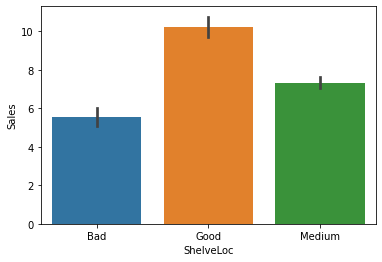

In [144]:
sns.barplot(data=data, x=feature, y=target)
plt.show()

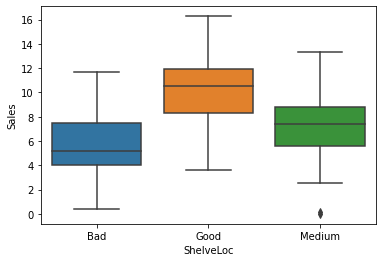

In [145]:
sns.boxplot(data=data, x=feature, y=target)
plt.show()

② 수치화 : t-test, anova

In [152]:
x1=data.loc[data[feature] == 'Good', 'Sales']
x2=data.loc[data[feature] == 'Bad', 'Sales']
x3=data.loc[data[feature] == 'Medium', 'Sales']

spst.f_oneway(x1,x2,x3)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

In [183]:
tmp = spst.f_oneway(x1,x2,x3)
print('검정통계량 :', tmp[0])
print('p-value :', tmp[1])

검정통계량 : 92.22990509910346
p-value : 1.26693609015938e-33


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 평균비교 그래프의 신뢰구간이 모두 겹치지 않는 것으로 판단된다.
> - Medium의 낮은 이상치가 존재한다.
> - p-value가 0에 가까운 수준을 보이고 있다.

> - 진열상태에 따라 판매액의 차이가 있다고 할 수 있다. ( 비교적 높은 관계 )

#### 2) [추가]US-> Sales

In [153]:
feature = 'US'

① 시각화 : 평균비교 barplot

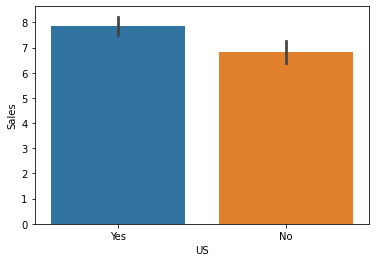

In [154]:
sns.barplot(data=data, x=feature, y=target)
plt.show()

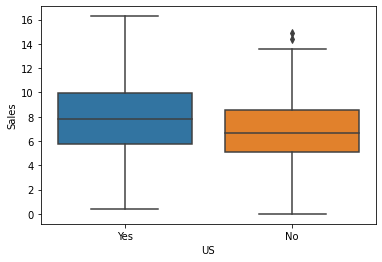

In [156]:
sns.boxplot(data=data, x=feature, y=target)
plt.show()

② 수치화 : t-test, anova

In [162]:
x11 = data.loc[data[feature]=='Yes',target]
x12 = data.loc[data[feature]=='No',target]

spst.ttest_ind(x11,x12)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

In [182]:
tmp = spst.ttest_ind(x11,x12)
print('검정통계량 :', tmp[0])
print('p-value :', tmp[1])

검정통계량 : 3.589738747802499
p-value : 0.00037233958701471517


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> - 평균비교 그래프상 약간의 차이가 있다고 할 수 있다.
> - No에 높은 이상치가 존재한다.
> - p-value 가 0.00037 로 작은 편에 속한다.

> - 미국에 있는지에 따라 판매액 차이가 있다고 할 수 있다.(높은 중간 관계)

## 4.관계 정리

### 1) 강한관계의 변수

> Price, ShelveLoc, US

### 2) 약한관계의 변수

> Age, Advertising

### 3) 관계 없음

> Population

### 4) 추가 분석